# 네이버 데이터랩 데이터와 그래프
* 노래방 데이터
* 음원 사재기 검색 비율

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [84]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [85]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [86]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time

In [87]:
import glob
import shutil

# 3-3-2. 신규 진입한 음원 소셜미디어 관심도

In [155]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [156]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

## 노래방 사이트 설정

In [ ]:
# 사이트 이름(ky, tj)
site_name = 'tj'

## 이번주 기간 설정

In [157]:
# 기간 설정
start_date = '2022-05-09'
end_date = '2022-05-15'

## 그래프 x축 설정

In [ ]:
# 그래프 x 축 설정
xticks_names = ['4월3주차', '4월4주차', '5월1주차', '5월2주차']

In [128]:
# 신규 진입 음원 파일 읽어 오기
folder_path = f'/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
path = code_path + folder_path
file_name = f'[{site_name}]{start_date}_{end_date}_pop_df.xlsx'
df = pd.read_excel(path + file_name)
df

,날짜,순위,곡,가수,사이트
0,2022-05-09,99,신촌을못가,포스트맨,Tj
1,2022-05-11,99,남자를몰라,버즈,Tj
2,2022-05-14,99,죽일놈(Guilty),다이나믹듀오,Tj
3,2022-05-15,85,버스안에서,자자,Tj


## 네이버 데이터 랩 검색

In [129]:
# 파일 저장 폴더 생성
naver_datalab_path = f'/crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/{site_name}/'
des = code_path + naver_datalab_path
os.makedirs(des, exist_ok=True)

In [130]:
ca.install(True)
driver = webdriver.Chrome()

In [131]:
# 네이버 데이터 랩 검색
for i in range(df.shape[0]):
    # 네이버 데이터 랩 접속
    url = 'https://datalab.naver.com/keyword/trendSearch.naver'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = df['곡'][i]
    search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 3개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 주간 클릭
    week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
    time.sleep( random.uniform(0.5, 1) )
    week_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div/ul/li[2]').click()
    time.sleep( random.uniform(0.5, 1) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)

    # 다운 버튼 클릭
    down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    down_folder = 'C:/Users/kbjung/Downloads/'
    down_xlsx = 'datalab.xlsx'
    title = df['곡'][i]
    artist = df['가수'][i]
    new_down_xlsx = f'{title}_{artist}.xlsx'
    os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

    # 파일 이동
    shutil.move(down_folder + new_down_xlsx, des + new_down_xlsx)
    print(f'{new_down_xlsx} 완료.')
print(f'{site_name} 신규 진입 음원 소셜 검색 비율 파일 다운 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/1764646853.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/1764646853.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/1764646853.py:22: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
C:\Users\kbjung

신촌을못가_포스트맨.xlsx 완료.
남자를몰라_버즈.xlsx 완료.
죽일놈(Guilty)_다이나믹듀오.xlsx 완료.
버스안에서_자자.xlsx 완료.
tj 신규 진입 음원 소셜 검색 비율 파일 다운 완료.


## 그래프 그리기

In [132]:
file_list = os.listdir(des)
file_list

['남자를몰라_버즈.xlsx',
 '버스안에서_자자.xlsx',
 '신촌을못가_포스트맨.xlsx',
 '죽일놈(Guilty)_다이나믹듀오.xlsx']

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


남자를몰라_버즈.png 저장 완료.
버스안에서_자자.png 저장 완료.
신촌을못가_포스트맨.png 저장 완료.
죽일놈(Guilty)_다이나믹듀오.png 저장 완료.


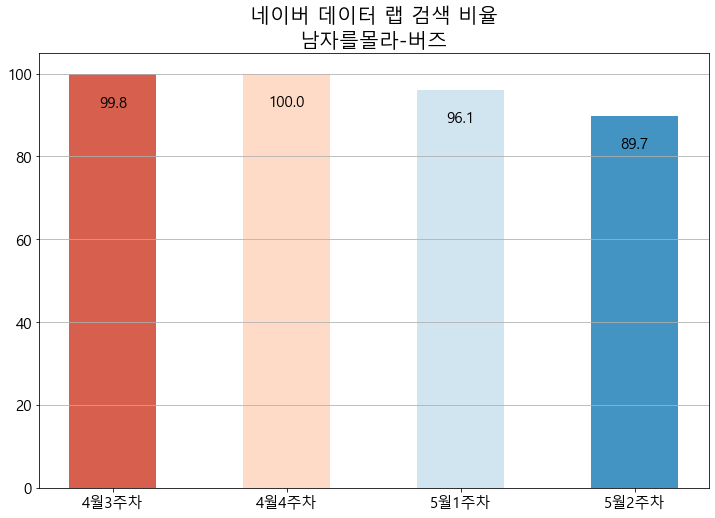

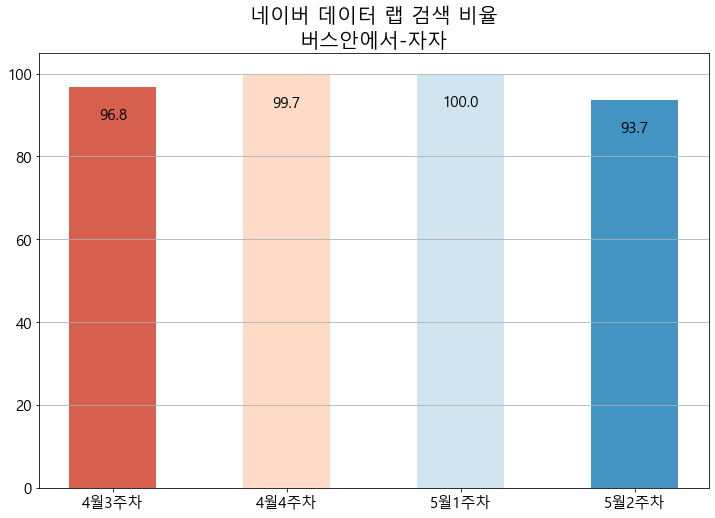

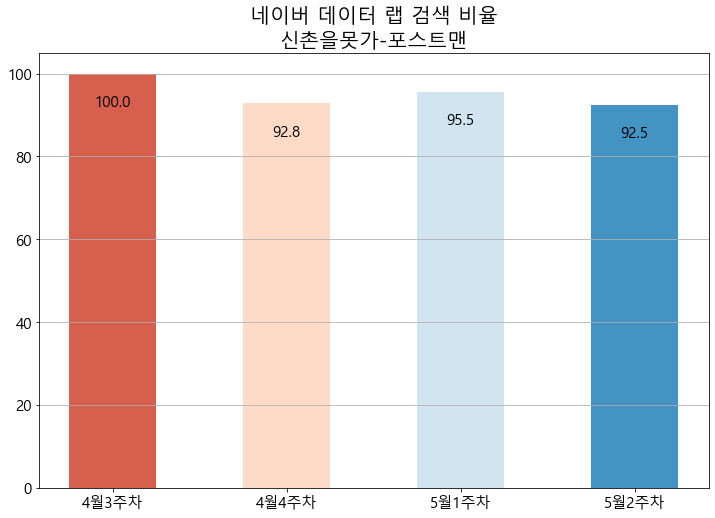

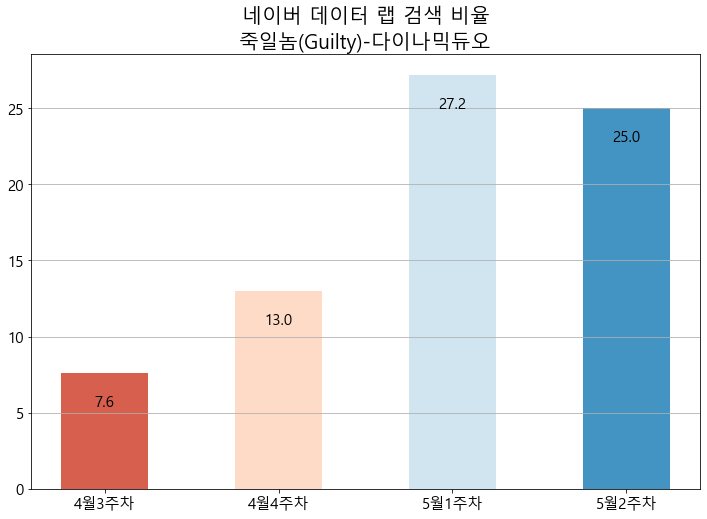

In [134]:
# 그래프 생성
file_list = os.listdir(des)
for one in file_list:
    title = one.split('_')[0]
    artist = one.split('_')[1].split('.')[0]
    temp = pd.read_excel(des + one)
    temp = temp.reset_index(drop=True)
    temp = temp.iloc[6:, :].reset_index(drop=True)
    temp.columns = ['날짜', '검색비율']

    date_list = pd.date_range(end=start_date, periods=4, freq='W-MON')
    start_week = str(date_list[0]).split(' ')[0]
    end_week = str(date_list[-1]).split(' ')[0]
    week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
    week_temp['검색비율'] = week_temp['검색비율'].astype(float)
    week_temp['검색비율'] = round(week_temp['검색비율'], 1)
    
    colors = sns.color_palette('RdBu', week_temp.shape[0])
    x = xticks_names
    y = week_temp['검색비율']
    try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.grid(axis='y')
        plt.bar(x, y, color=colors, width=0.5)
        plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(xticks_names ,fontsize=15)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                    plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='bottom')
                else:
                    plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='top')
        plt.savefig(des + f'{title}_{artist}.png')
        print(f'{title}_{artist}.png 저장 완료.')
    except:
        pass    

In [160]:
driver.quit()

# 2-2. 주간 음원 모니터링 결과(음원 사재기 검색 비율), 5. 음원사재기에 대한 관심

In [154]:
# 그래프 x축 설정
xticks_names2 = ['5월1주차', '5월2주차']

In [136]:
# 파일 저장 폴더 생성
naver_datalab_path = f'/crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/'
des2 = code_path + naver_datalab_path
os.makedirs(des2, exist_ok=True)

In [137]:
ca.install(True)
driver = webdriver.Chrome()

In [138]:
# 네이버 데이터 랩 검색
# 네이버 데이터 랩 접속
url = 'https://datalab.naver.com/keyword/trendSearch.naver'
driver.get(url)
driver.implicitly_wait(3)
time.sleep( random.uniform(1, 1.5) )
driver.maximize_window()

# 검색어 입력
word = '음원 사재기'
search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
search_box.clear()
time.sleep( random.uniform(1, 1.5) )
search_box.send_keys(word)

# 3개월 picker 클릭
time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
time.sleep( random.uniform(1, 1.5) )

# 주간 클릭
week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
time.sleep( random.uniform(0.5, 1) )
week_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div/ul/li[2]').click()
time.sleep( random.uniform(0.5, 1) )

# 검색 버튼 클릭
search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
time.sleep( random.uniform(1, 1.5) )
driver.implicitly_wait(3)

# 다운 버튼 클릭
down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
time.sleep( random.uniform(1, 1.5) )

# 파일 이름 변경
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'
new_down_xlsx = f'{word}.xlsx'
os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

# 파일 이동
shutil.move(down_folder + new_down_xlsx, des2 + new_down_xlsx)
print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/2256697129.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/2256697129.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_5356/2256697129.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
C:\Users\kbjung

음원 사재기.xlsx 완료.


In [139]:
driver.quit()

## 그래프

In [140]:
file_list = os.listdir(des2)
file_list

['ky', 'tj', '음원 사재기.xlsx']

In [151]:
des2

'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-09_2022-05-15/naver_datalab/'

음원 사재기.png 저장 완료.


C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


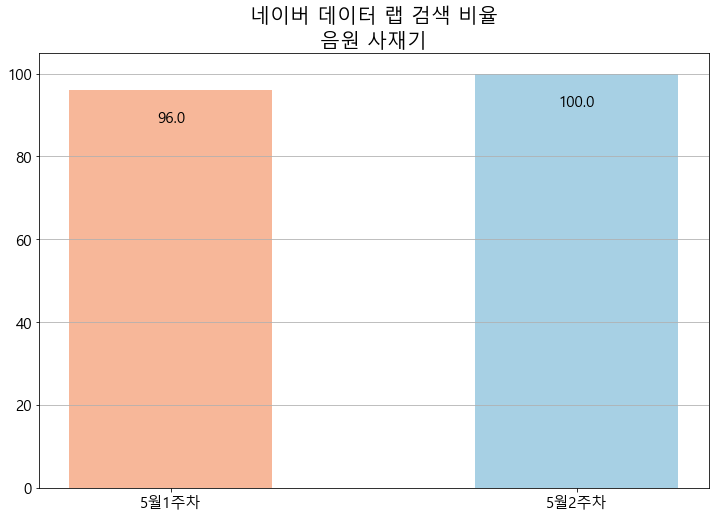

In [153]:
# 그래프 생성
file_list = os.listdir(des2)
for one in file_list:
    if '음원 사재기.xlsx' in one:
        temp = pd.read_excel(des2 + one)
        temp = temp.reset_index(drop=True)
        temp = temp.iloc[6:, :]
        temp = temp.reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']

        date_list = pd.date_range(end=start_date, periods=2, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(float)
        week_temp['검색비율'] = round(week_temp['검색비율'], 1)
        
        colors = sns.color_palette('RdBu', week_temp.shape[0])
        x = xticks_names2
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.grid(axis='y')
            plt.bar(x, y, color=colors, width=0.5)
            plt.title(f"네이버 데이터 랩 검색 비율\n{word}", fontsize=20)
            plt.xticks(xticks_names2 ,fontsize=15)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                                horizontalalignment='center',
                                verticalalignment='bottom')
                    else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                                horizontalalignment='center',
                                verticalalignment='top')
            plt.savefig(des2 + f'{word}.png')
            print(f'{word}.png 저장 완료.')
        except:
            pass    

# 코드 마지막